# 1. Детектор углов Харриса

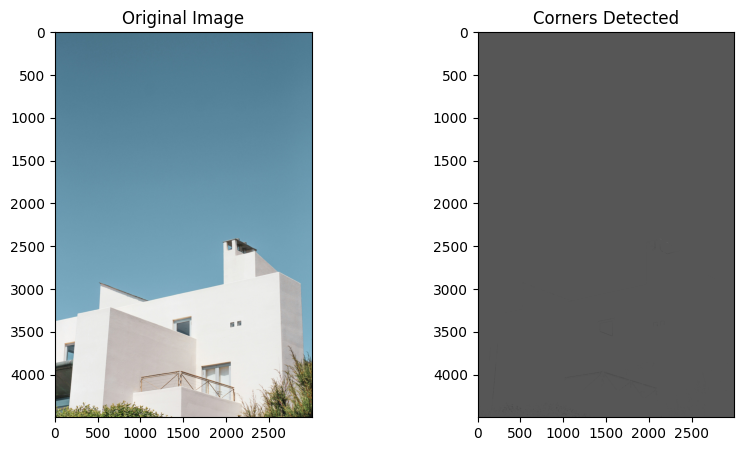

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Считывание изображения
image = cv2.imread('house_photo.jpeg')

# Создание копии изображения
image_copy = np.copy(image)

# Преобразование цветов из BGR в RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Отображение оригинального изображения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_copy)
plt.title("Original Image")

# Преобразование изображения в градации серого
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Обнаружение углов
dst = cv2.cornerHarris(gray, 2, 3, 0.05)

# Нормализация результата для корректного отображения
dst_normalized = cv2.normalize(dst, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
dst_normalized = np.uint8(dst_normalized)

# Отображение нормализованного результата
plt.subplot(1, 2, 2)
plt.imshow(dst_normalized, cmap='gray')
plt.title("Corners Detected")

plt.show()

In [2]:
# Это значение зависит от изображения и количества углов, которые вы хотите обнаружить
# Попробуйте изменить этот свободный параметр (0.1), сделав его больше или меньше, и посмотрите результат
thresh = 0.01 * dst.max()

# Создание копии изображения для отображения углов
corner_image = np.copy(image_copy)

# Проход по всем углам и их отрисовка на изображении (если они проходят пороговое значение)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j, i] > thresh):
            # параметры: изображение, точка центра, радиус, цвет, толщина
            cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 20)

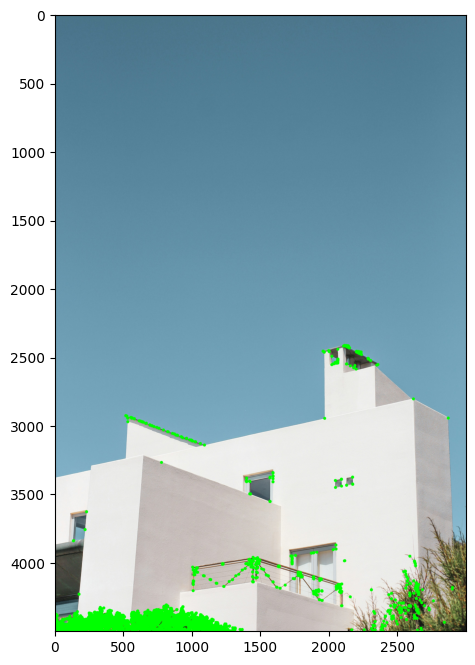

In [3]:
plt.figure(figsize=(15, 8))

# Отображение изображения с углами
plt.imshow(corner_image)

# ДЗ часть 1: Используя указанный выше код для получения признаков детектором углов Харриса напишите функцию, которая на вход получает путь к изображению, возвращая результат найденных детектером признаков и выводя финальное изображение на экран.

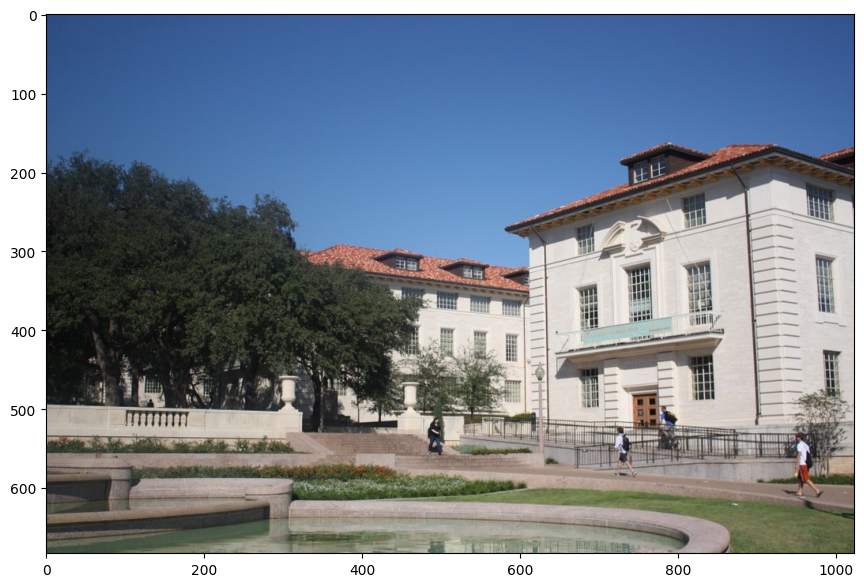

In [31]:
path_to_image = "street_2.jpeg"

# Считывание изображения
image = cv2.imread(path_to_image)
# Преобразование цветов из BGR в RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image);

In [20]:
def drawing_dots(var):
    # Это значение зависит от изображения и количества углов, которые вы хотите обнаружить
    thresh = var * dst.max()

    # Создание копии изображения для отображения углов
    corner_image = np.copy(image_copy)

    # Проход по всем углам и их отрисовка на изображении (если они проходят пороговое значение)
    for j in range(0, dst.shape[0]):
        for i in range(0, dst.shape[1]):
            if(dst[j, i] > thresh):
                # параметры: изображение, точка центра, радиус, цвет, толщина
                cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 5)
    
    return corner_image

In [ ]:
def harris_corner_detector(path):
    # Создание копии изображения
    image_copy = np.copy(path)

    # Преобразование изображения в градации серого
    gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
    gray = np.float32(gray)

    # Обнаружение углов
    dst = cv2.cornerHarris(gray, 2, 3, 0.05)

    # Нормализация результата для корректного отображения
    dst_normalized = cv2.normalize(dst, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    dst_normalized = np.uint8(dst_normalized)

    res1 = drawing_dots(0.01)
    res2 = drawing_dots(0.1)

    plt.figure(figsize=(15, 8))

    plt.subplot(121)
    plt.title("0.01")
    plt.imshow(res1)
    plt.subplot(122)
    plt.title("0.1")
    plt.imshow(res2)
    plt.tight_layout
    plt.show()

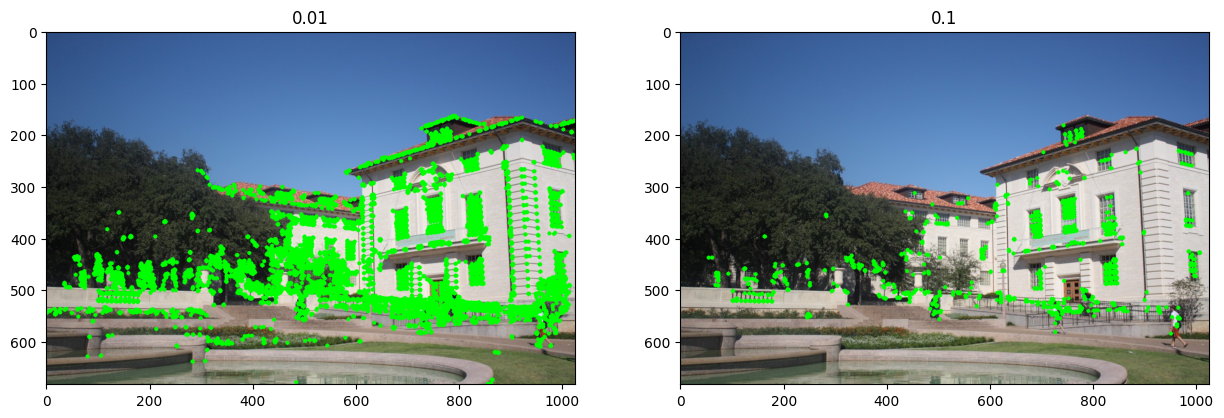

In [32]:
harris_corner_detector(path=image)

# 2. SIFT алгоритм

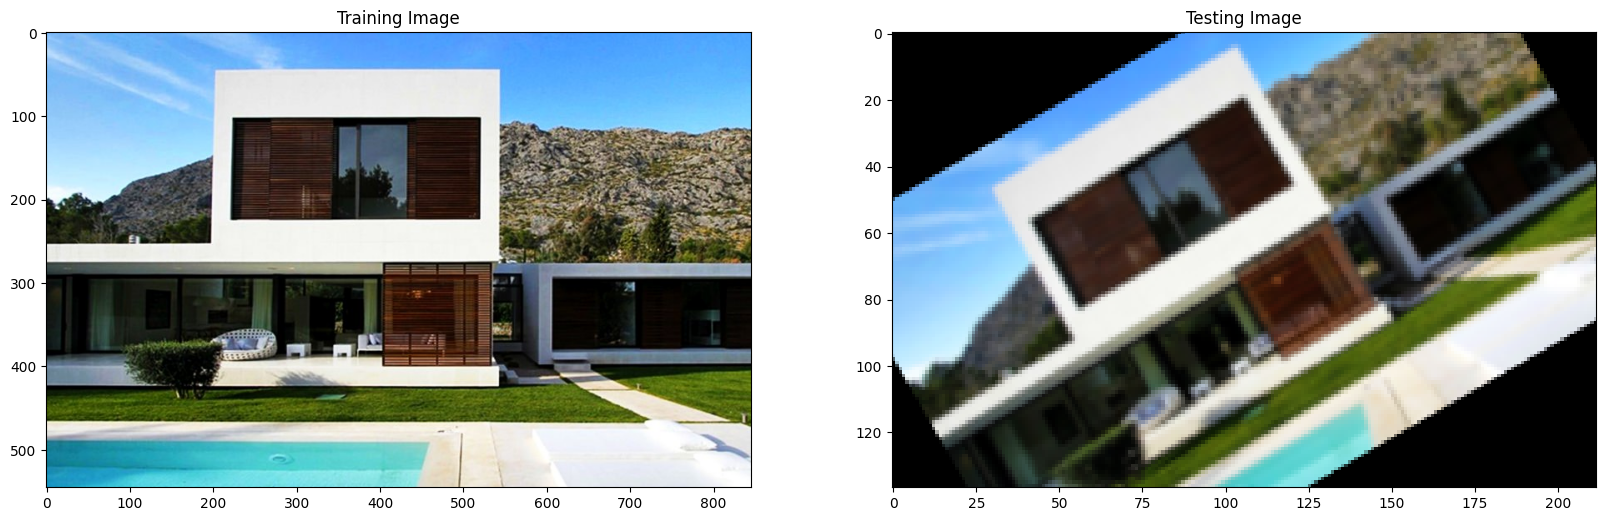

In [24]:
# Загрузка
image1 = cv2.imread('house_photo_2.jpg')

# Конвертируем исходное изображение в RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Конвертируем исходное изображение в gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Создаем изображение для теста для его поворота и проверки инвариантности алгоритма
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Отобразим изображения
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  3397
Number of Keypoints Detected In The Query Image:  200


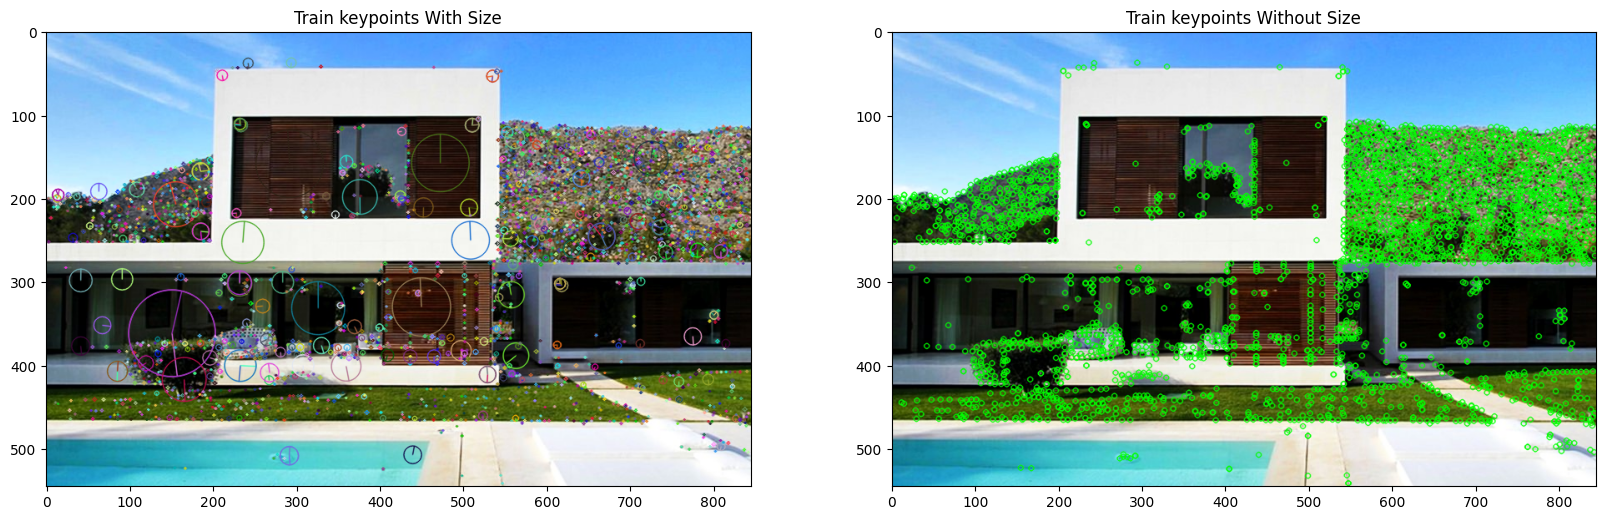

In [28]:
# Создаем инстанс (экземпляр класса) SIFT метода
sift = cv2.SIFT_create()

# Найдем ключевые точки на исходном и тестовым снимках
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

# Копирование ключевых точек
keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

# Отображение ключевых точек
cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Отобразим изображение с и без размеров ключевых точек
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Отобразим количество ключевых точек на исходном и тестовом снимках
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

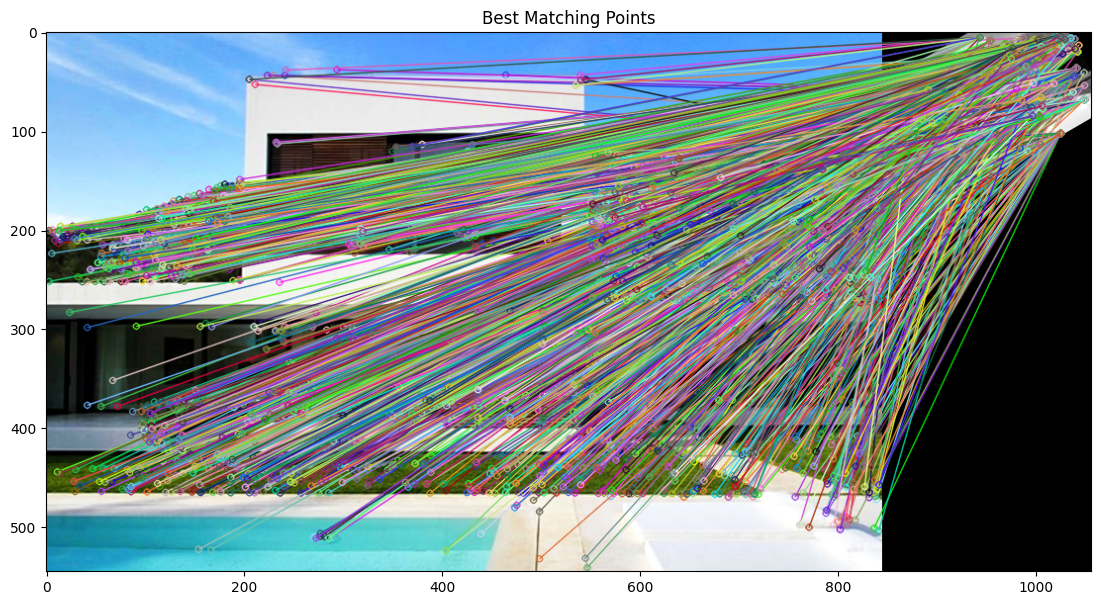


Number of Matching Keypoints Between The Training and Query Images:  3397


In [29]:
# Создаем объект прямого алгоритма сопоставления
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Сопостовляем признаковое описание (128-элементные векторы) между исходным и тестовым снимкам
matches = bf.match(train_descriptor, test_descriptor)

# Результаты с наименьшим расстоянием (между векторами) - то что нужно
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Отображаем лучшие ключевые точки
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# ДЗ часть 2*: Используя код выше для реализации SIFT метода для поиска ключевых точек и вынесения соотвествия между изображениями создайте функцию, которая будет на вход принимать путь к двум изображениям и в результате выполнения возвращать соотнесенные ключевые точки. Учтите, что в качестве изображений для работы у вас будет две разные картинки площади, имеющих одну общую часть, для которой и необходимо выполнить поиск (мы с вами на практике 11 уже видели их). Т.е. в качестве train_image у вас должно быть просто второе изображение, над которым не нужны проводить транфсормаций.

**Также можете добавить результаты выполнения промежуточных преобразований, как указано выше.**

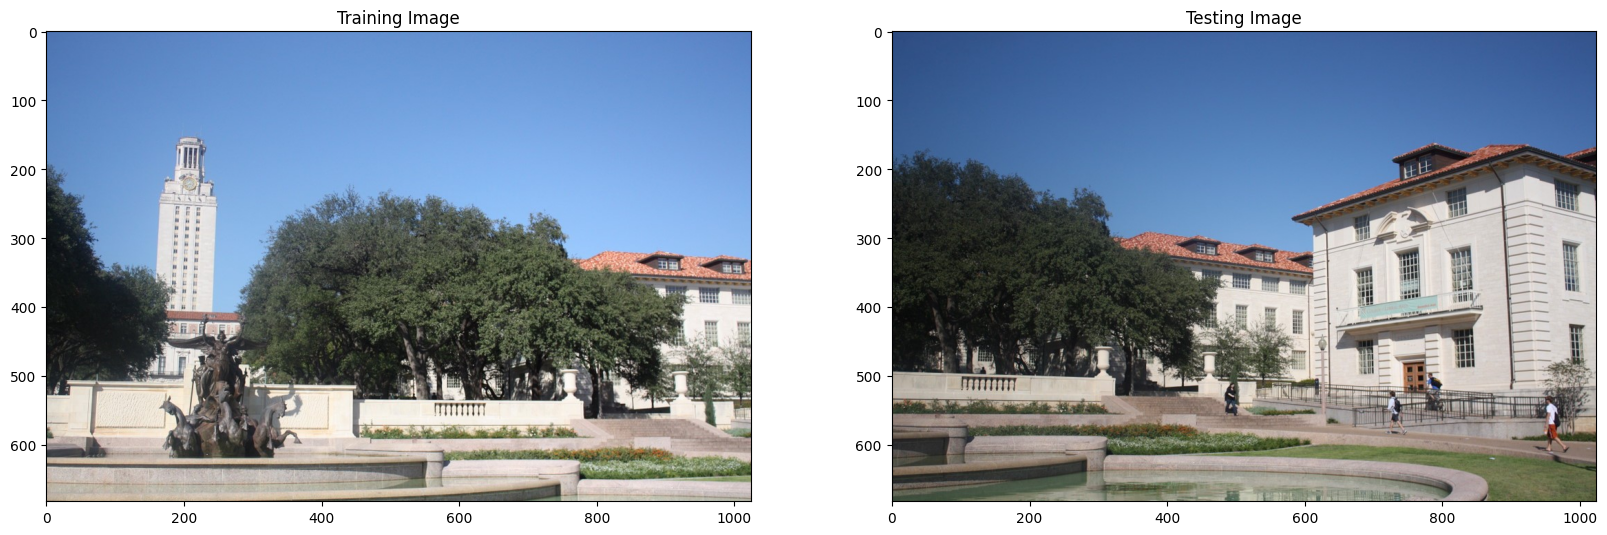

In [34]:
path_to_image_1 = "street_1.jpeg"
path_to_image_2 = "street_2.jpeg"

# Считывание изображения
image_1 = cv2.imread(path_to_image_1)
# Преобразование цветов из BGR в RGB
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

image_2 = cv2.imread(path_to_image_2)
# Преобразование цветов из BGR в RGB
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# Отобразим изображения
fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Training Image")
plots[0].imshow(image_1)

plots[1].set_title("Testing Image")
plots[1].imshow(image_2)

In [50]:
def match_keypoints(image_path1, image_path2):
    # Загрузка изображений
    train_image = cv2.imread(image_path1)
    test_image = cv2.imread(image_path2)
    
    # Преобразование цветов из BGR в RGB
    train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
    # Конвертация в оттенки серого
    train_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)
    test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    
    # Создание инстанса SIFT
    sift = cv2.SIFT_create()
    
    # Нахождение ключевых точек и дескрипторов
    train_keypoints, train_descriptor = sift.detectAndCompute(train_gray, None)
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    
    # Создание объекта для сопоставления (BFMatcher)
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)
    matches = bf.match(train_descriptor, test_descriptor)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Отображение совпадающих ключевых точек
    result = cv2.drawMatches(train_image, train_keypoints, test_image, test_keypoints, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(14, 7))
    plt.title('Result')
    plt.imshow(result)
    plt.show()
    
    print("\nNumber of Matching Keypoints Between The Training and Query Images:", len(matches))

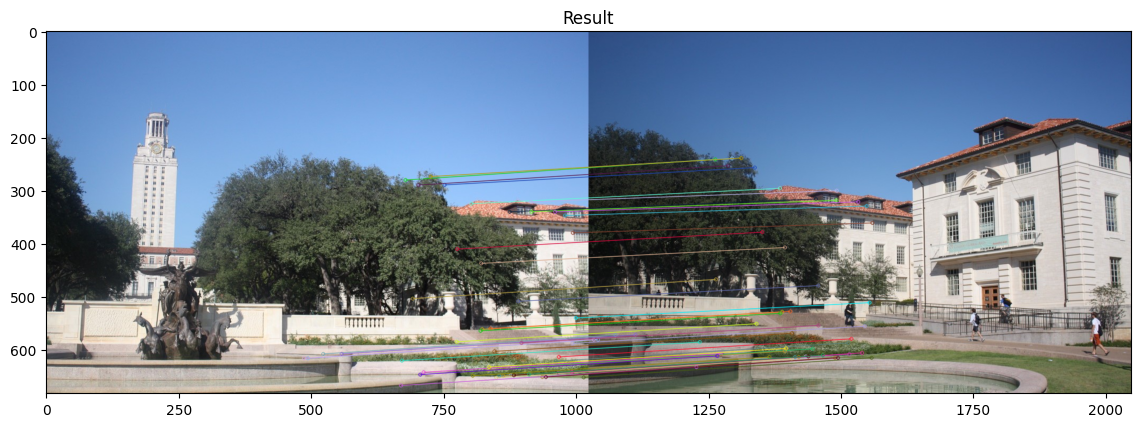


Number of Matching Keypoints Between The Training and Query Images: 5355


In [51]:
match_keypoints(image_path1=path_to_image_1, image_path2=path_to_image_2)